In [53]:
import numpy as np

#### パーセプトロンの実装

In [54]:
class Perceptron(object):
  
  def __init__(self,eta=0.01,n_iter=50,random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale = 0.01,size = 1 + X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi,target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update

        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  
  def net_input(self,X):
    return np.dot(X,self.w_[1:]) + self.w_[0]

  def predict(self,X):
    return np.where(self.net_input(X) >= 0.0,1,-1)
  


  

#### Iris dataset

In [55]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu','ml','machine-learning-databases','iris','iris.data')
print('URL:',s)

df = pd.read_csv(s,header=None,encoding='utf-8')
df.head()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


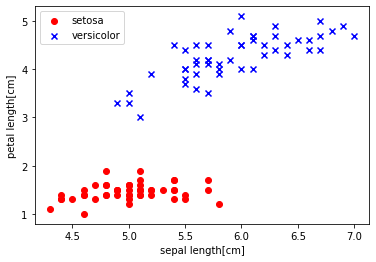

In [56]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa',-1,1)

X = df.iloc[0:100,[0,2]].values

plt.scatter(X[:50,0],X[:50,1],color = 'red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label = 'versicolor')
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')

plt.legend(loc='upper left')
plt.show()

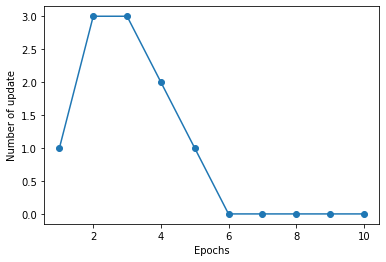

In [57]:
ppn = Perceptron(eta = 0.1,n_iter = 10)

ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_) + 1),ppn.errors_,marker = "o")
plt.xlabel('Epochs')
plt.ylabel('Number of update')
plt.show()

#### 決定境界

In [58]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution = 0.02):
  markers = ('s','x','o','^','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min,x1_max = X[:,0].min() - 1, X[:,0].max() +1
  x2_min,x2_max = X[:,1].min() -1 , X[:,1].max() +1

  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
  Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1,xx2,Z,alpha = 0.3,cmap = cmap)

  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())

  for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],y = X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],label = cl)
    

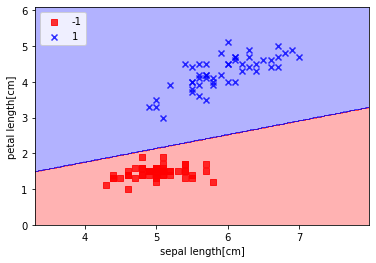

In [59]:
plot_decision_regions(X,y,classifier=ppn)

plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')

plt.legend(loc='upper left')
plt.show()


#### ADALINEGD(バッチ勾配降下方)の実装

In [60]:
class AdalineGD(object):
    
    def __init__(self,eta = 0.01,n_iter = 50,random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01,size = 1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) >= 0.0,1,-1)
        


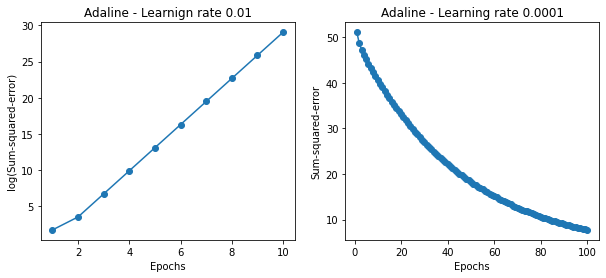

In [61]:
fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ada1 = AdalineGD(n_iter=10,eta=0.01).fit(X,y)
ax[0] .plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learnign rate 0.01')

ada2 = AdalineGD(n_iter = 100,eta = 0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_,marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

#### 特徴量スケーリング(正規化)

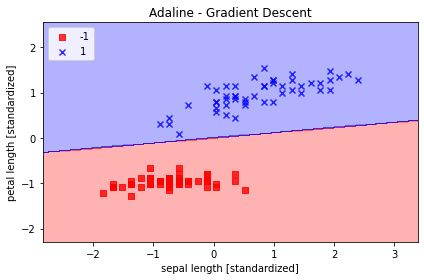

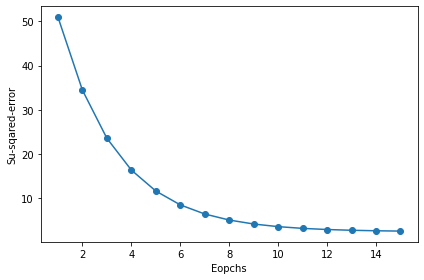

In [62]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada_gd = AdalineGD(n_iter=15,eta=0.01)
ada_gd.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1,len(ada_gd.cost_) + 1),ada_gd.cost_,marker = 'o')
plt.xlabel('Eopchs')
plt.ylabel('Su-sqared-error')
plt.tight_layout()
plt.show()

#### ADALINE(確率的勾配降下方)の実装

In [63]:
from numpy.random import seed

class AdalineSGD(object):

    def __init__(self,eta=0.01,n_iter=10,shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self,X,y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X,y = self._shuffle(X,y)
            
            cost = []

            for xi,target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self,X,y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi,target in zip(X,y):
                self._update_weights(xi,target)
        else:
            self.update_weights(X,y)
        return self
    
    def _shuffle(self,X,y):
        r = self.rgen.permutation(len(y))
        return X[r] , y[r]
    
    def _initialize_weights(self,m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0,scale = 0.01,size=1+m)
        self.w_initialized = True
    
    def _update_weights(self,xi,target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error ** 2
        return cost
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def activation(self,X):
        return X
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) >= 0.0,1,-1)

        
    

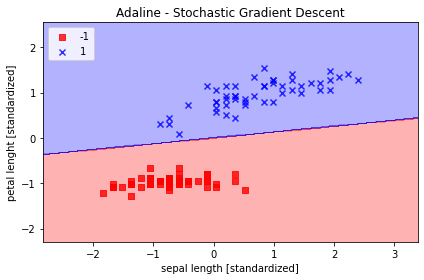

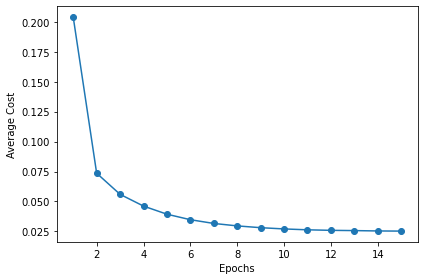

In [64]:
ada_sgd = AdalineSGD(n_iter = 15, eta=0.01,random_state=1)
ada_sgd.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada_sgd)

plt.title('Adaline - Stochastic Gradient Descent')

plt.xlabel('sepal length [standardized]')
plt.ylabel('petal lenght [standardized]')

plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

plt.plot(range(1,len(ada_sgd.cost_)+1),ada_sgd.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()


#### scikit-learn

In [65]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

print('Class labels:',np.unique(y))

Class labels: [0 1 2]


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify = y)

In [67]:
print('label counts in y:',np.bincount(y))
print('label counts in y/train:',np.bincount(y_train))
print('label count in y_test',np.bincount(y_test))

label counts in y: [50 50 50]
label counts in y/train: [35 35 35]
label count in y_test [15 15 15]


In [68]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [69]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: {}'.format((y_test!=y_pred).sum()))


Misclassified examples: 1


In [70]:
from sklearn.metrics import accuracy_score
print('Accuracy:{:3f}'.format(accuracy_score(y_test,y_pred)))
#以下同じ
print('Accuracy:{:3f}'.format(ppn.score(X_test_std,y_test)))

Accuracy:0.977778
Accuracy:0.977778


#### 決定境界2

In [71]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx = None,resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min,x1_max = X[:,0].min() - 1, X[:,0].max() +1
    x2_min,x2_max = X[:,1].min() -1 , X[:,1].max() +1

    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1,xx2,Z,alpha = 0.3,cmap = cmap)

    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y = X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],label = cl)
    
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c= 'none' ,edgecolors='black',alpha=1.0,linewidths=1,marker='o',s=100,label='test set')
        

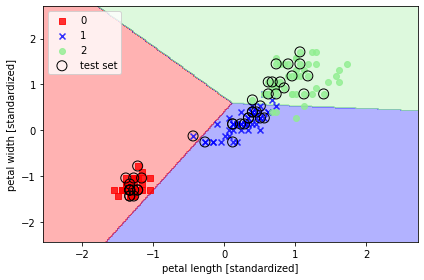

In [72]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

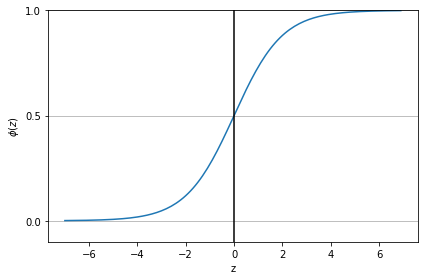

In [73]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1,1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0,0.5,1.0])

ax = plt.gca()

ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

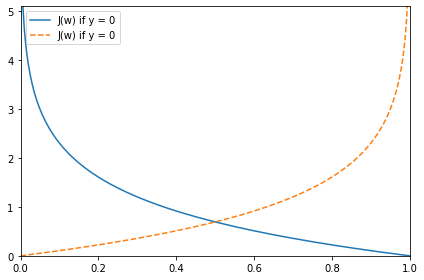

In [74]:
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1-sigmoid(z))

z = np.arange(-10,10,0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z,c1,label='J(w) if y = 0')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z,c0,linestyle ='--',label ='J(w) if y = 0')

plt.ylim(0.0,5.1)
plt.xlim(0,1)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### ロジスティック回帰の実装

In [75]:
class LogisticRegressionGD(object):

    def __init__(self,eta = 0.05,n_iter = 100,random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self,X,y):

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01,size = 1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta *  errors.sum()

            cost = -y.dot(np.log(output)) - ((1-y).dot(np.log(1-output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def activation(self,z):
        return 1. / (1. + np.exp(-np.clip(z,-250,250)))

    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0,1,0)
    

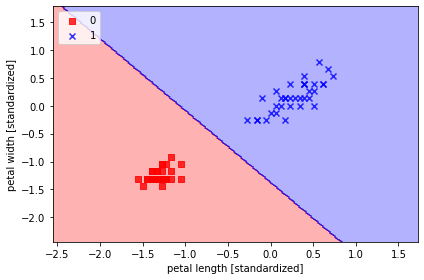

In [76]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta = 0.05,n_iter=1000,random_state=1)
lrgd.fit(X_train_01_subset,y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,y=y_train_01_subset,classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

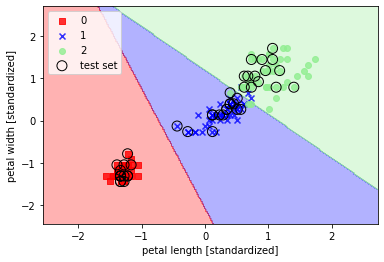

In [77]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0,random_state=1,solver='lbfgs',multi_class='ovr')
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [78]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

#### 正規化

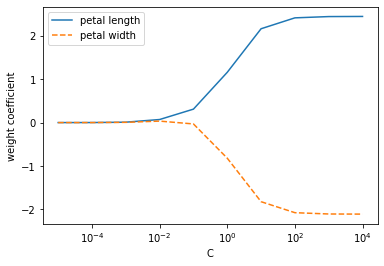

In [79]:
weights,params = [],[]
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.**c,random_state=1,solver='lbfgs',multi_class='ovr')
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params,weights[:,0],label = 'petal length')
plt.plot(params,weights[:,1],linestyle='--',label = 'petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

#### SVM

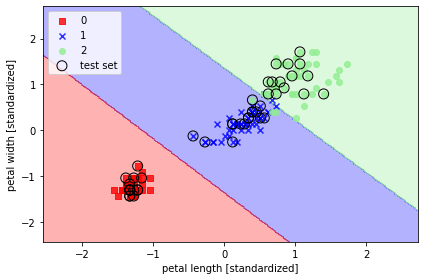

In [80]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C = 1.0,random_state=1)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

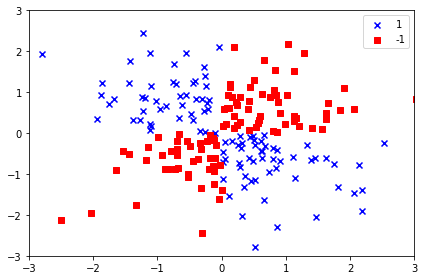

In [81]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0,X_xor[:,1] > 0)
y_xor = np.where(y_xor,1,-1)

plt.scatter(X_xor[y_xor == 1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='r',marker='s',label='-1')

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

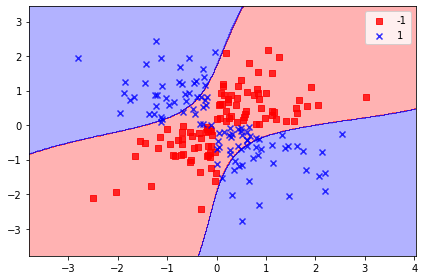

In [82]:
svm = SVC(kernel='rbf',random_state=1,gamma = 0.1,C=1.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 決定木

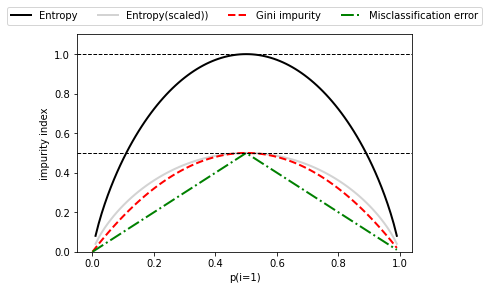

In [83]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p) * (1 - p) + (1-p) * (1- (1-p))

def entropy(p):
    return - p*np.log2(p) - (1-p)*np.log2((1-p))

def error(p):
    return 1- np.max([p,1-p])

x = np.arange(0.0,1.0,0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax=plt.subplot(111)
for i,lab,ls,c, in zip([ent,sc_ent,gini(x),err],['Entropy','Entropy(scaled))','Gini impurity','Misclassification error'],['-','-','--','-.'],['black','lightgray','red','green','cyan']):
    line = ax.plot(x,i,label=lab,linestyle=ls,lw=2,color=c)
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.15),ncol = 5,fancybox=True,shadow=False)
ax.axhline(y=0.5,linewidth=1,color='k',linestyle='--')
ax.axhline(y=1.0,linewidth=1,color='k',linestyle='--')

plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel("impurity index")
plt.show()


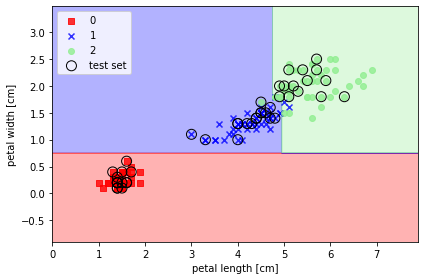

In [97]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)

tree_model.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X_combined,y_combined,classifier=tree_model,test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


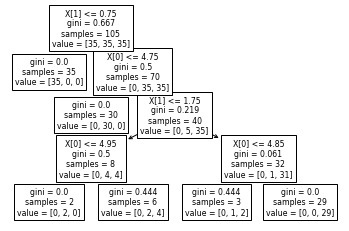

In [98]:
from sklearn.tree import plot_tree
plot_tree(tree_model)
plt.show()

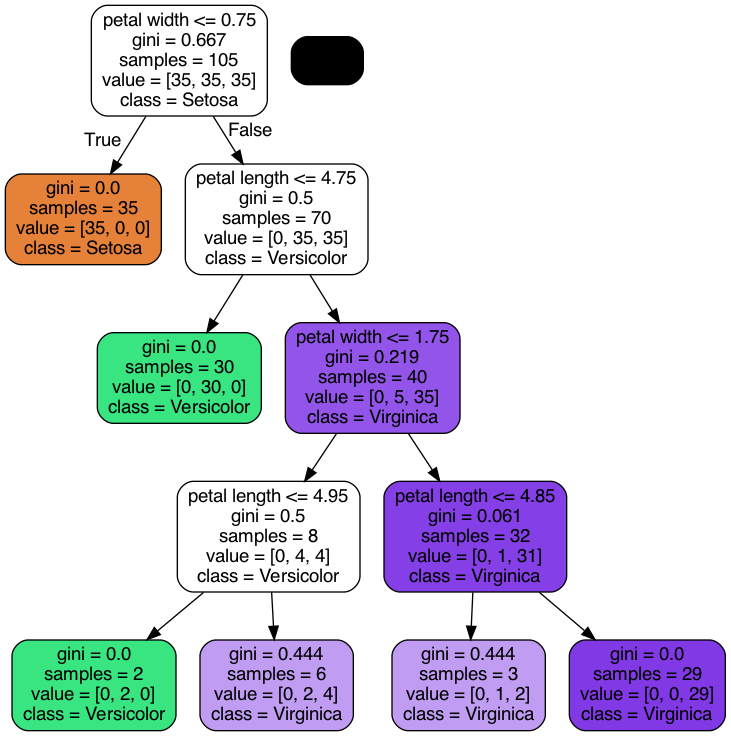

In [99]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(tree_model,filled=True,rounded=True,class_names=['Setosa','Versicolor','Virginica'],feature_names=['petal length','petal width'],out_file = None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
Image('tree.png')

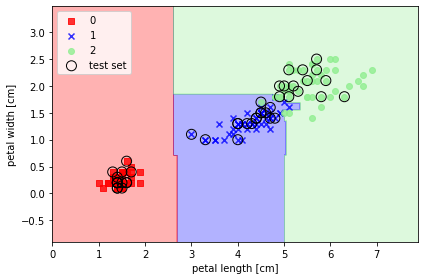

In [100]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=1,n_jobs=2)

forest.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined,classifier=forest,test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

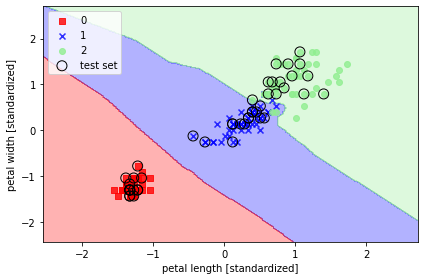

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()